# get the data

In [273]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [11]:
full_regression_data = pickle.load( open( "full_regression_data.pkl", "rb" ) )

# Feature engineering

In [301]:
full_regression_data.head()

,index,title,domestic_total,runtime,rating,release_date,num_weeks,weekly_data,weekly_gross1,weekly_gross2,...,rank3,rank4,rank5,rank6,rank7,rank8,rank9,rank10,rank11,rank12
0,0,The A-Team,77222099,117,PG-13,2010-06-11,14,"{u'weekly_gross': [36022270, 20820708, 9247972...",36022270,20820708,...,7,7,10,15,20,22,28,32,38,45
1,1,A.C.O.D.,175705,88,PG-13,2013-10-04,5,"{u'weekly_gross': [26439, 48909, 64916, 24656,...",26439,48909,...,47,54,67,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,A.I. Artificial Intelligence,78616689,145,PG-13,2001-06-29,11,"{u'weekly_gross': [45535716, 19346848, 7471014...",45535716,19346848,...,10,12,15,20,37,43,55,38,41,NaN
3,3,Aaja Nachle,484108,145,Unrated,2007-11-30,3,"{u'weekly_gross': [310893, 132908, 40307], u'n...",310893,132908,...,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Aarakshan,651096,NaN,Unrated,2011-08-12,6,"{u'weekly_gross': [440710, 159031, 39141, 1011...",440710,159031,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Filter the features by number of weeks that have happened

In [119]:
def filter_features_by_week(features,weeks_happened):
    feature_names = features.columns
    feature_subset = features[features['num_weeks']>weeks_happened]
    target_cols = [np.array(range(weeks_happened))+(i*12+8) for i in range(0,3)]
    target_cols.append(np.array([6]))
    target_names = feature_names[list(np.concatenate(target_cols))]
    feature_subset = feature_subset[target_names].dropna()
    return feature_subset.pop('num_weeks'), feature_subset

# Break data into train and test

In [153]:
y,X = filter_features_by_week(full_regression_data,2)

In [163]:
pd.isnull(y).sum()

0

In [154]:
y.head(10)

0     14
1      5
2     11
3      3
5      6
6      9
9      4
10     4
11    12
12     4
Name: num_weeks, dtype: int64

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

##### Need to reset the indexes so that I can grab correct cross validation rows

In [156]:
# cv_index_reset  = [X_train, X_test]

In [157]:
# X_train, X_test = [d.reset_index().drop('index', 1) for d in [X_train, X_test]]

# Further subest train into train and cross validation

In [165]:
training_cv_splits = []
kf = KFold(len(X_train),n_folds=4,shuffle = True)
for train_index, cv_index in kf:
    training_cv_splits.append((train_index,cv_index))

In [167]:
def grab_train_cv_data(X,y,index):
    return X.iloc[index], y.iloc[index]

In [192]:
a,b = grab_train_cv_data(X_train,y_train,training_cv_splits[3][0])

# try both ridge or lasso regression

In [293]:
def alpha_success_level(alpha,X,y):
    rgr = linear_model.Ridge(alpha = alpha)
    X_scaled = preprocessing.scale(X)
    rgr.fit(X_scaled,y)
    pred = rgr.predict(X_scaled)
    return mean_squared_error(y, pred)

In [299]:
def alpha_min_mse(X,y):
    alpha_levels = np.arange(0,20,.5)
    mse_by_alpha = np.array([])
    for level in alpha_levels:
        mse = alpha_success_level(level,X,y)
        mse_by_alpha = np.append(mse_by_alpha,mse)
    return alpha_levels[np.argmin(mse_by_alpha)]

0.0

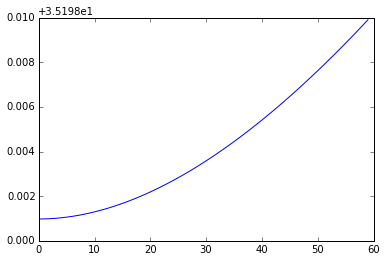

In [298]:
plt.plot(mse_by_alpha)